In [ ]:
from sklearn.cluster import KMeans

In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pre-Processing the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df = df.drop(columns=['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


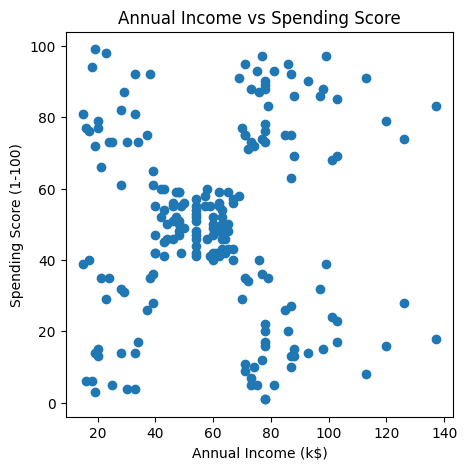

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

In [12]:
# Lets take annual income and spending score as features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [13]:
clustering_Scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random', random_state=42)
    kmeans.fit(X)
    clustering_Scores.append(kmeans.inertia_)


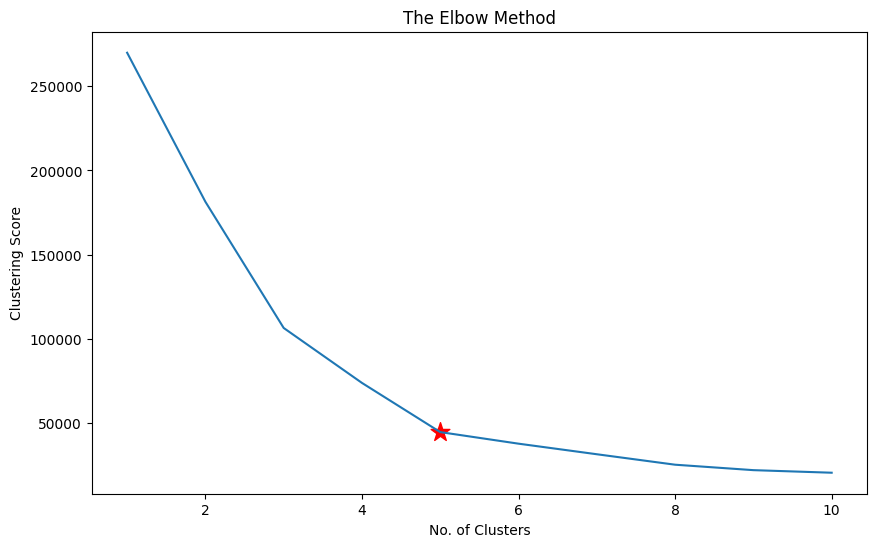

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_Scores)
plt.scatter(5,clustering_Scores[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
kmeans.fit(X)

pred = kmeans.predict(X)
pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [16]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852]])

In [17]:
df['Cluster'] = pd.DataFrame(pred, columns=['Cluster']) 
print("Number of customers in each cluster:")
df.groupby('Cluster').size()

Number of customers in each cluster:


Cluster
0    23
1    22
2    35
3    39
4    81
dtype: int64

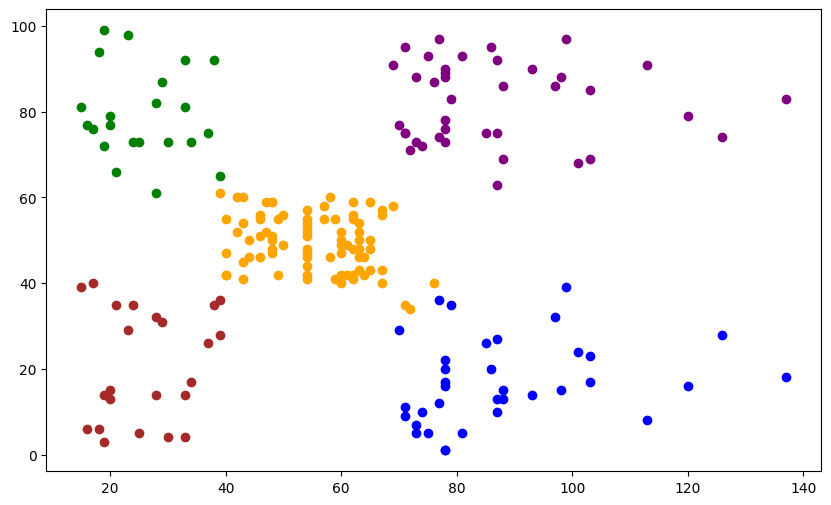

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

Text(0.5, 1.0, 'Customer Clusters')

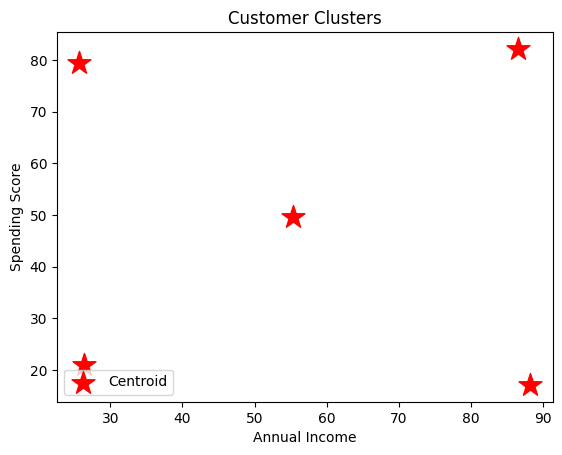

In [19]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

Text(0.5, 1.0, 'Customer Clusters')

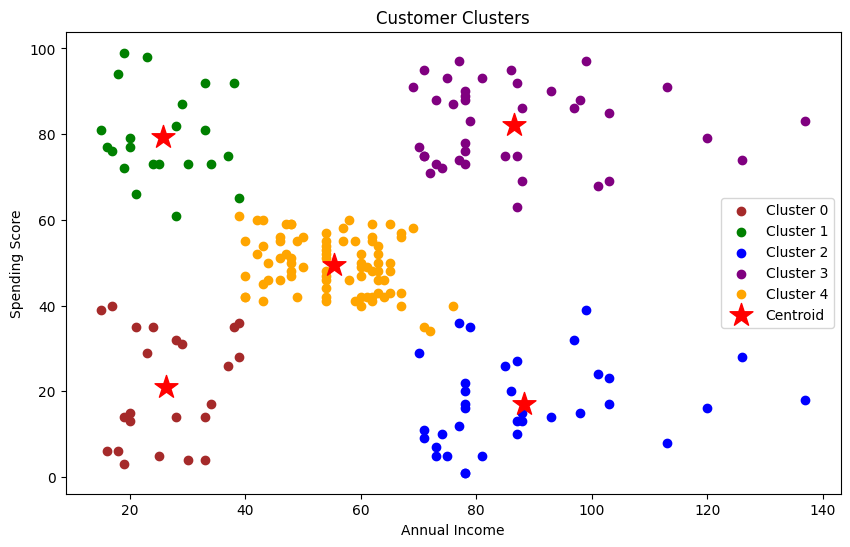

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [21]:
def plot_k_means_progress(centroid_history, n_clusters, centroid_sets, cluster_color):
    """
    Plots the progression of K-Means clustering over iterations.
    """
    plt.figure(figsize=(10,6))
    for j in range(n_clusters):
        plt.plot(centroid_history[j::n_clusters, 0], centroid_history[j::n_clusters, 1], 
                 marker='o', linestyle='-', color=cluster_color[f'c_{j}'])

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Centroid Movement Across Iterations')
    plt.legend([f'Cluster {i} Path' for i in range(n_clusters)])
    plt.show()

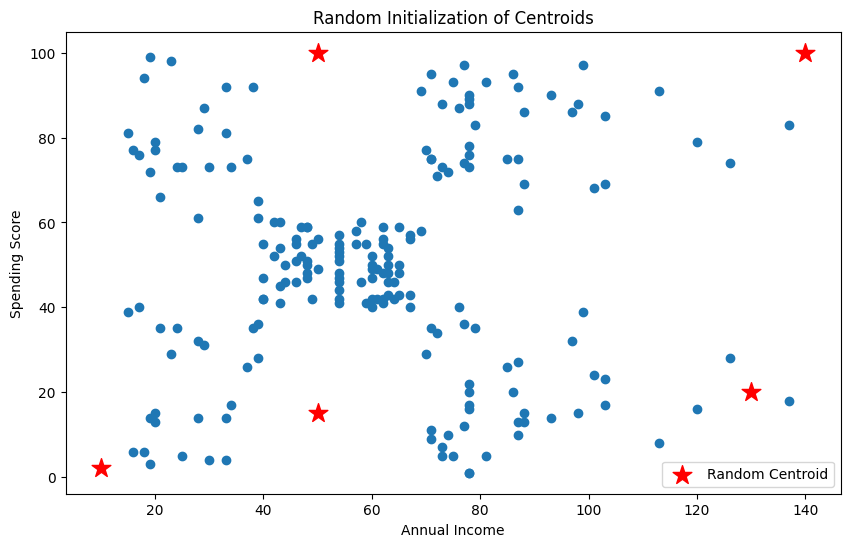

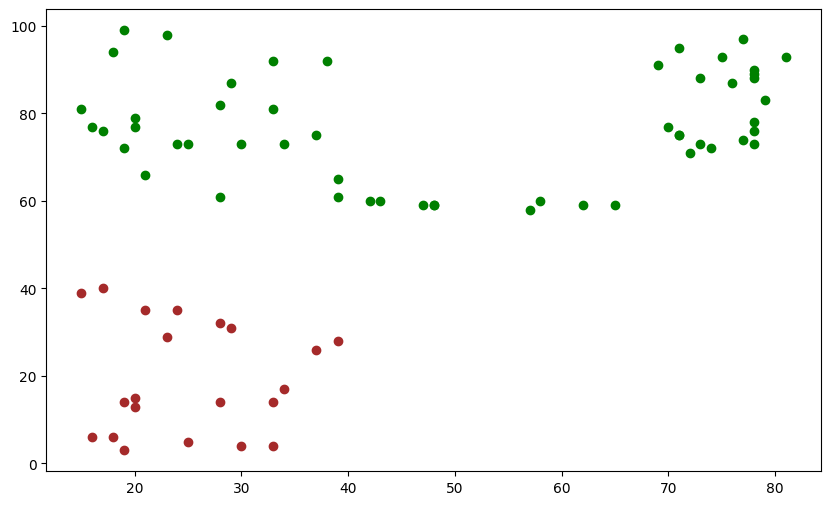

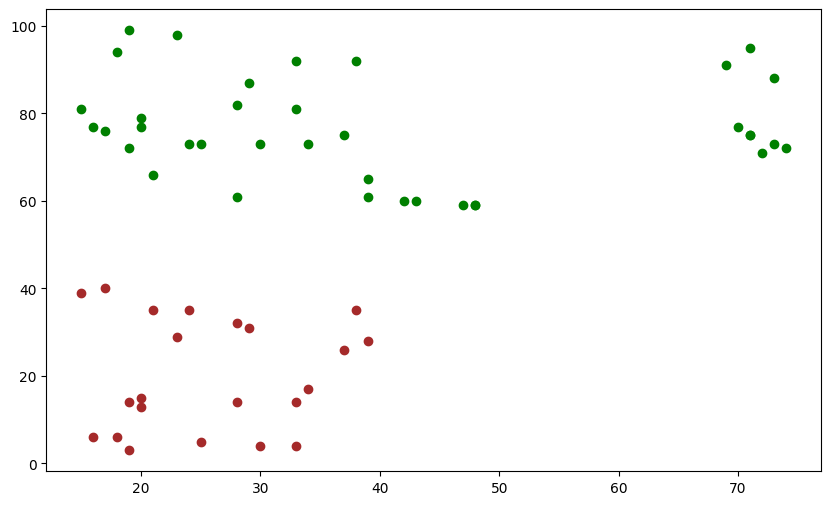

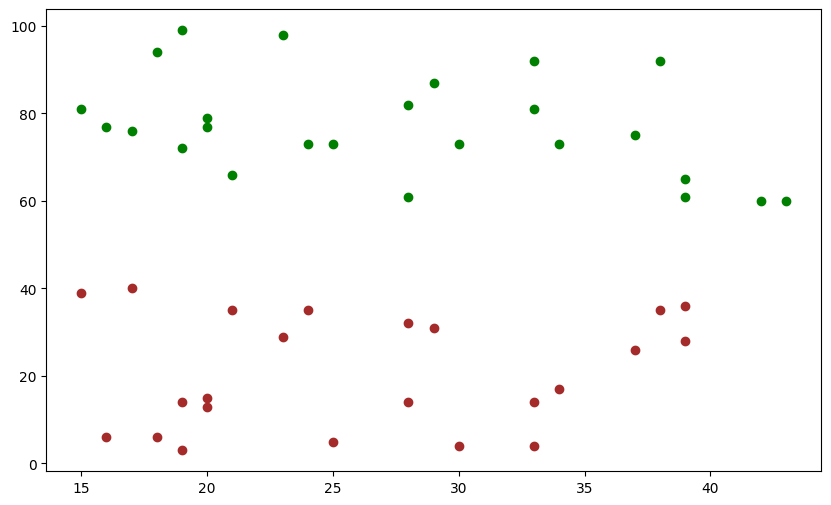

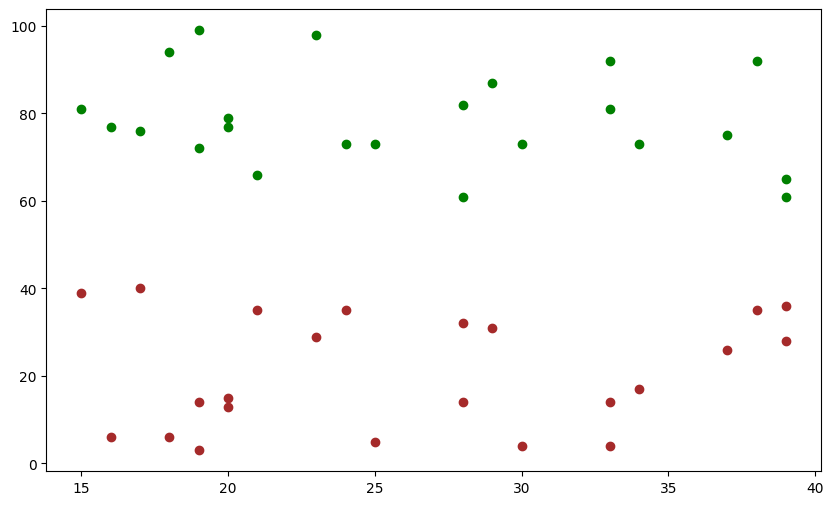

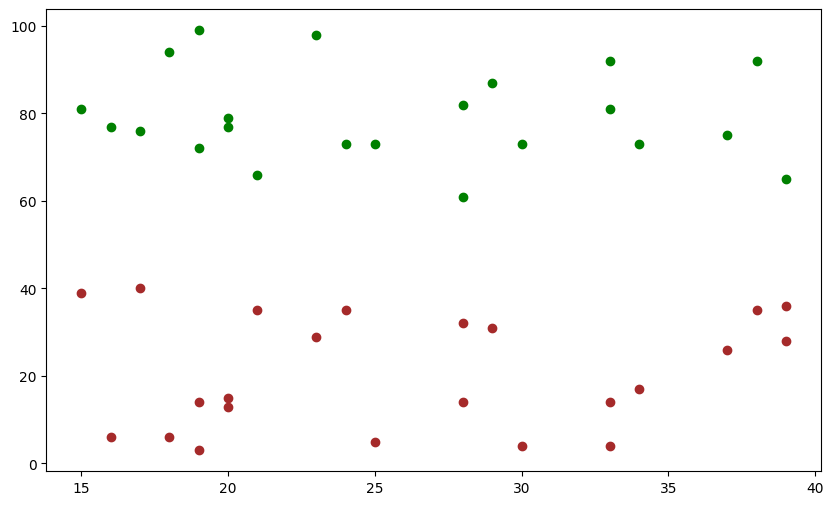

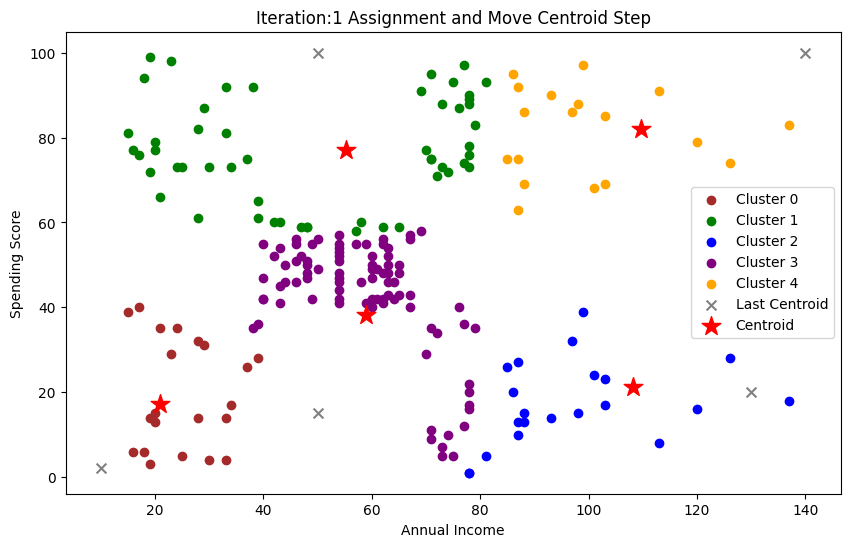

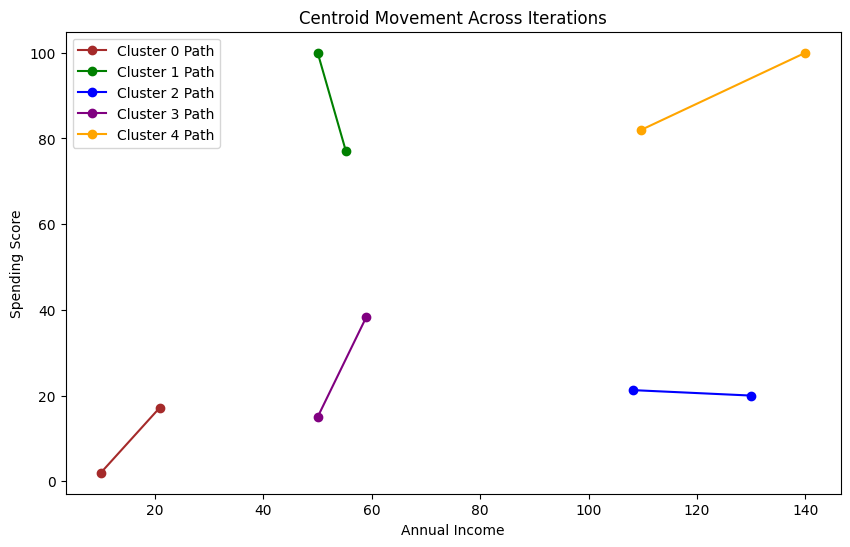

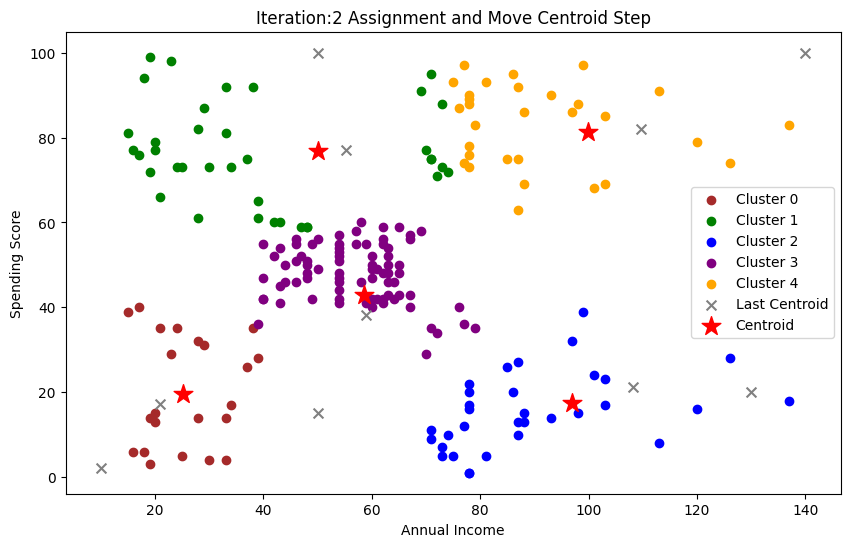

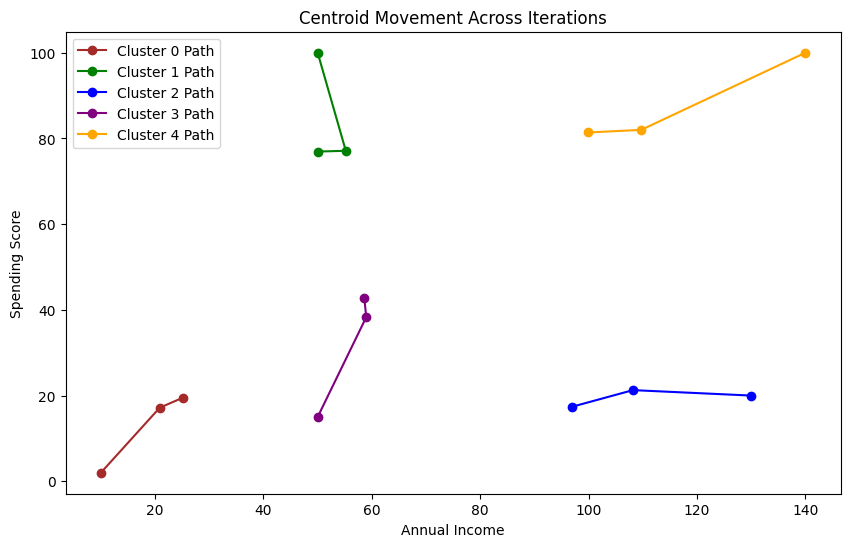

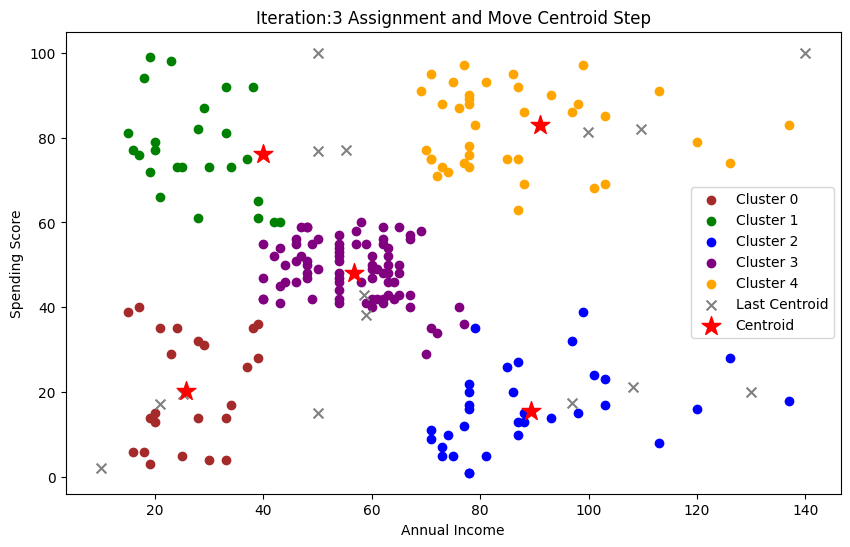

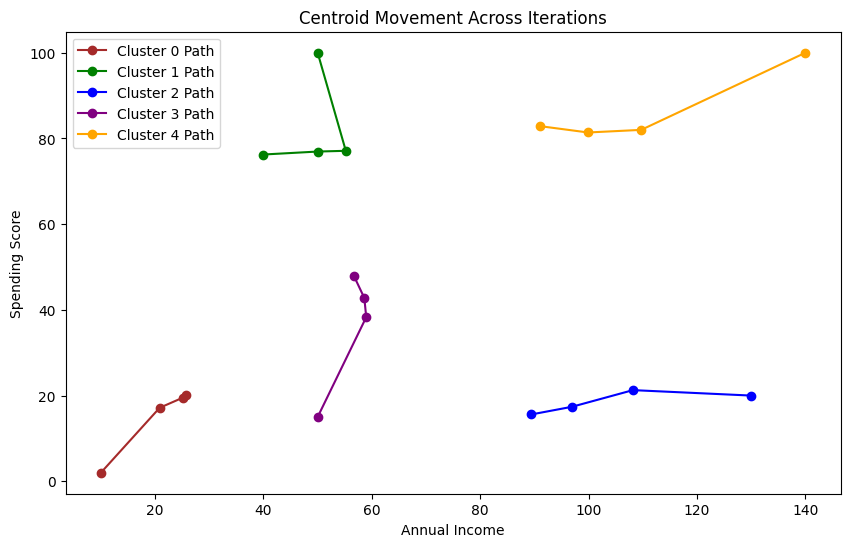

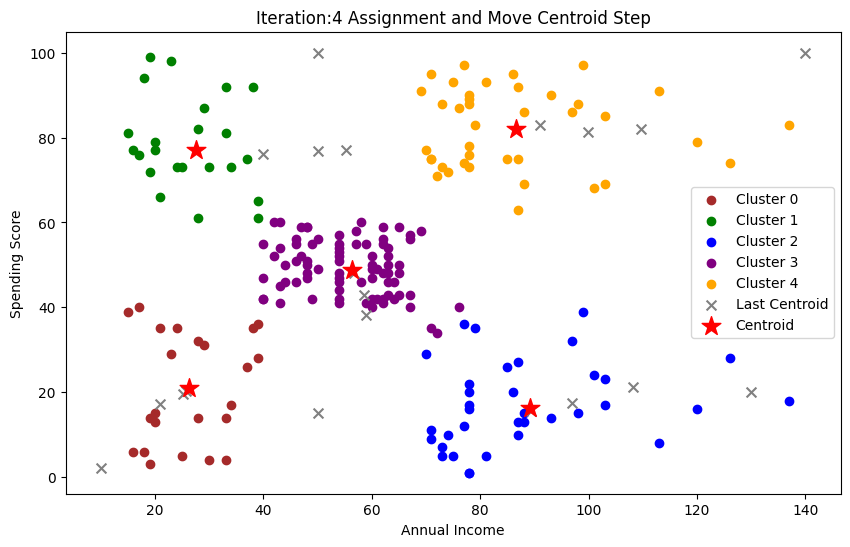

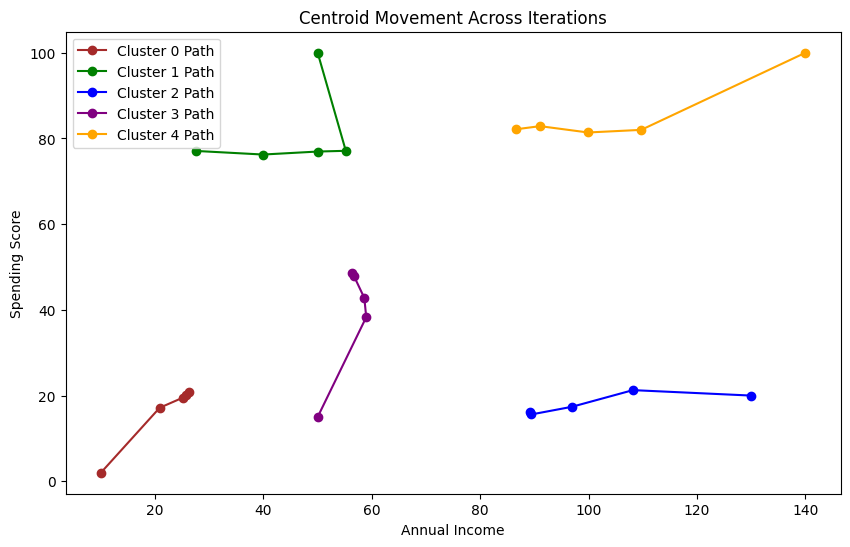

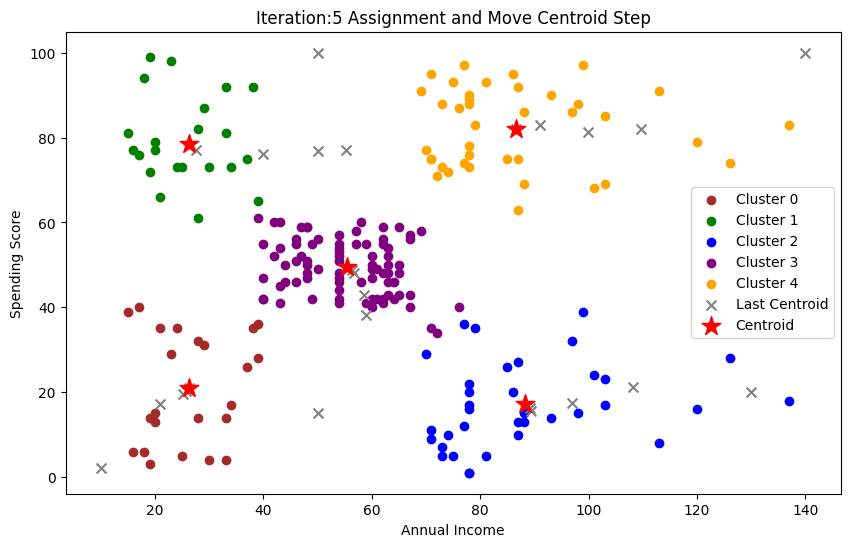

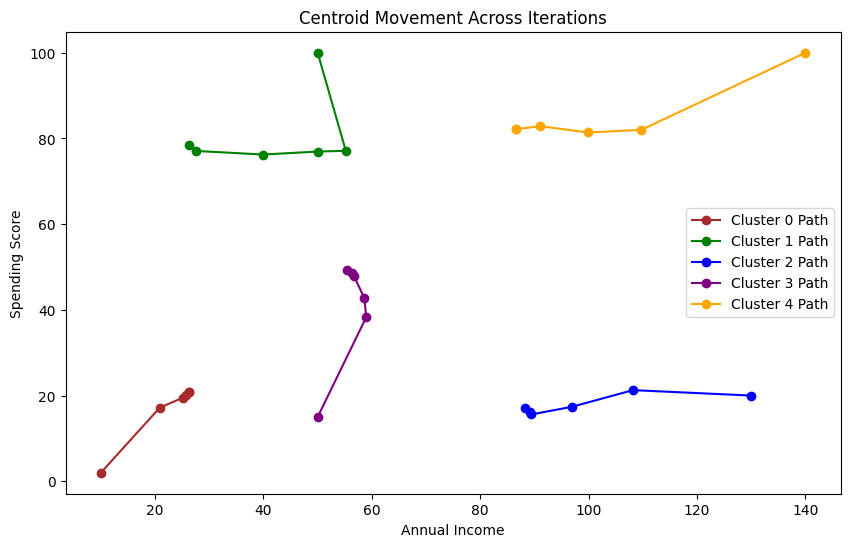

In [22]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    #
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')

    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')

    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)





In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
df['Cluster'] = pd.DataFrame(clusters, columns=['Cluster']) 
print("Number of customers in each cluster:")
df.groupby('Cluster').size()

Number of customers in each cluster:


Cluster
-1      8
 0    157
 1     35
dtype: int64

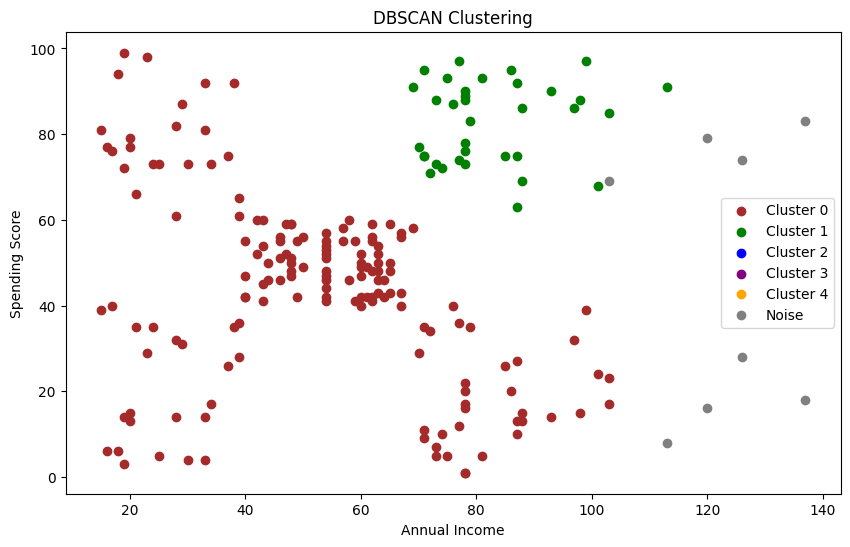

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], c = 'orange', label = 'Cluster 4')
plt.scatter(X[clusters == -1, 0], X[clusters == -1, 1], c = 'gray', label = 'Noise')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('DBSCAN Clustering')
plt.show()


DBSCAN classifying most points into one large cluster (0), a few in cluster 1, and some as noise (-1)

K-Means giving a more balanced segmentation

Let’s tune the eps (neighborhood radius) using the k-distance graph, which is a standard method to find a good eps.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


In [ ]:
k_distances = np.sort(distances[:, 4])

# Find the knee point
knee = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
eps_value = k_distances[knee.knee]

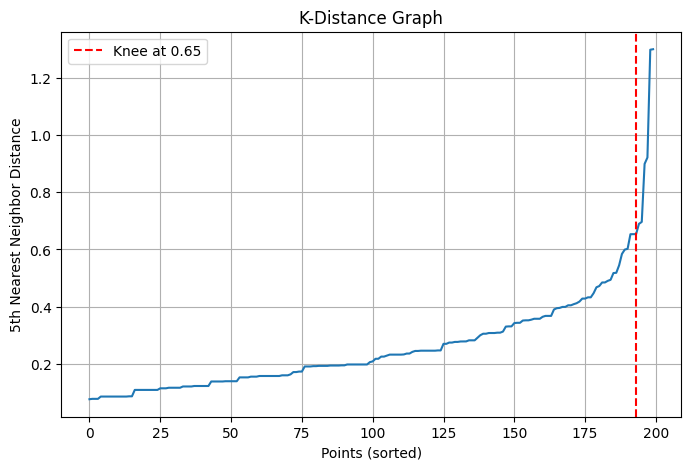

Optimal eps estimated from knee: 0.654


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.axvline(x=knee.knee, color='r', linestyle='--', label=f"Knee at {round(eps_value, 2)}")
plt.title("K-Distance Graph")
plt.xlabel("Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal eps estimated from knee: {round(eps_value, 3)}")

Number of customers in each cluster:
Cluster
 0    113
 2     32
 3     27
-1     17
 1     11
Name: count, dtype: int64


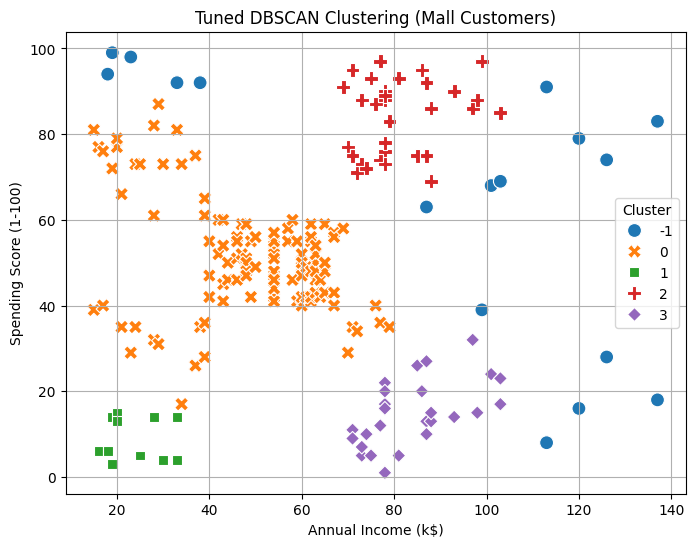

In [ ]:

dbscan = DBSCAN(eps=0.37, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df['Cluster'] = labels

print("Number of customers in each cluster:")
print(df['Cluster'].value_counts())

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)', 
    hue='Cluster', palette='tab10', data=df, style='Cluster', s=100
)
plt.title('Tuned DBSCAN Clustering (Mall Customers)')
plt.grid(True)
plt.show()

In [46]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_all = scaler.fit_transform(df[features])


In [47]:
# Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

In [48]:
# Knee plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 4])
knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
optimal_eps = distances[knee.knee]

In [49]:
# DBSCAN
dbscan = DBSCAN(eps=optimal_eps, min_samples=4)
labels = dbscan.fit_predict(X_pca)

df['Cluster_DBSCAN'] = labels

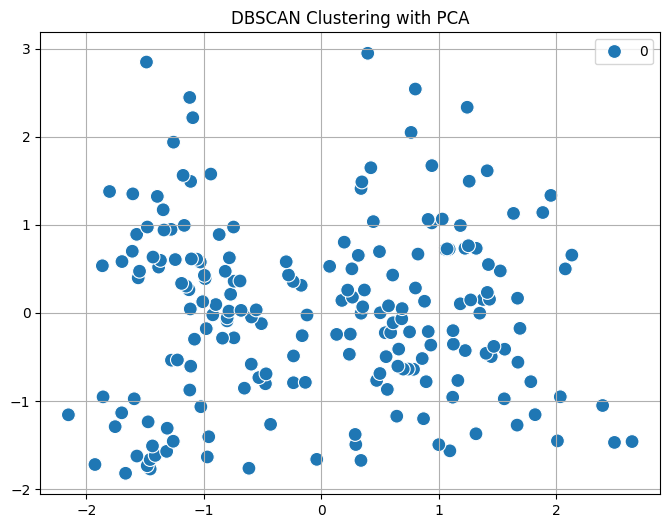

In [50]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10', s=100)
plt.title('DBSCAN Clustering with PCA')
plt.grid(True)
plt.show()


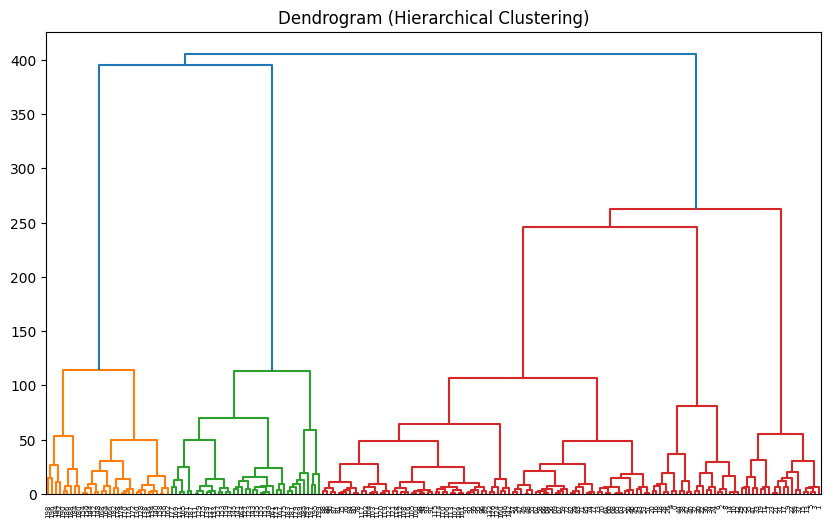

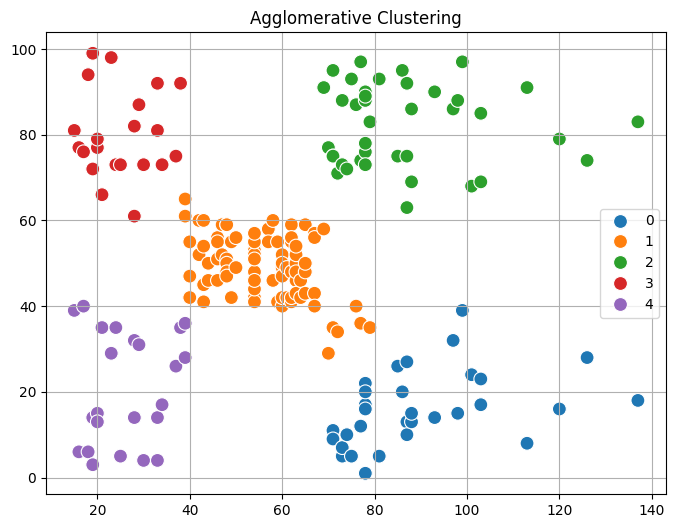

In [51]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogram to find optimal clusters
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.show()

# Model
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X)
df['Cluster_Agglo'] = labels_agglo

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_agglo, palette='tab10', s=100)
plt.title('Agglomerative Clustering')
plt.grid(True)
plt.show()


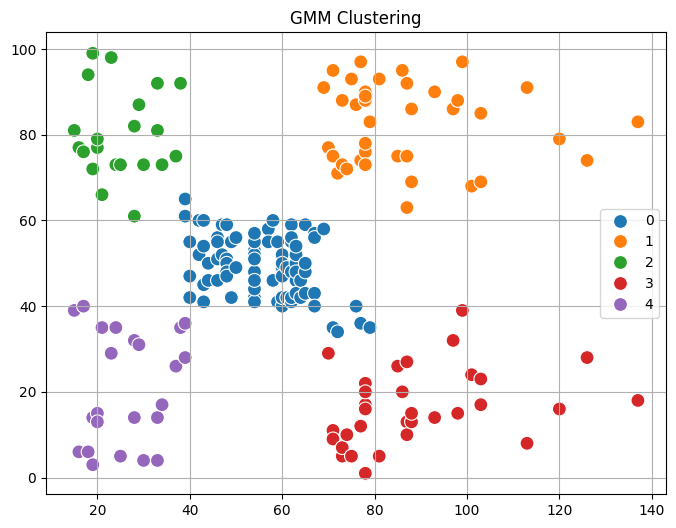

In [53]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X)
df['Cluster_GMM'] = gmm_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=gmm_labels, palette='tab10', s=100)
plt.title('GMM Clustering')
plt.grid(True)
plt.show()
